In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

#from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [22]:

# Keeping only the neccessary columns
data = data[['OriginalTweet','Sentiment']]

KeyError: "None of [Index(['OriginalTweet', 'Sentiment'], dtype='object')] are in the [index]"

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [4]:
train, test = train_test_split(data,test_size = 0.25)
train_ntrl = train[ train['Sentiment'] == 'Neutral']
train_ntrl = train_ntrl['OriginalTweet']
train_pos = train[ train['Sentiment'] == 'Positive']
train_pos = train_pos['OriginalTweet']
train_neg = train[ train['Sentiment'] == 'Negative']
train_neg = train_neg['OriginalTweet']
train_ex_pos = train[ train['Sentiment'] == 'Extremely Positive']
train_ex_pos = train_ex_pos['OriginalTweet']
train_ex_neg = train[ train['Sentiment'] == 'Extremely Negative']
train_ex_neg = train_ex_neg['OriginalTweet']

In [5]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.OriginalTweet.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.Sentiment))
    
test_ntrl = test[ test['Sentiment'] == 'Neutral']
test_ntrl = test_ntrl['OriginalTweet']
test_pos = test[ test['Sentiment'] == 'Positive']
test_pos = test_pos['OriginalTweet']
test_neg = test[ test['Sentiment'] == 'Negative']
test_neg = test_neg['OriginalTweet']
test_ex_pos = test[ test['Sentiment'] == 'Extremely Positive']
test_ex_pos = test_ex_pos['OriginalTweet']
test_ex_neg = test[ test['Sentiment'] == 'Extremely Negative']
test_ex_neg = test_ex_neg['OriginalTweet']

In [6]:
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [7]:
training_set = nltk.classify.apply_features(extract_features,tweets) 
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [8]:
data = pd.read_csv('test2.csv')
# Keeping only the neccessary columns
data = data['OriginalTweet']
result=[]
i=0
for obj in data: 
    res =  classifier.classify(extract_features(obj.split()))
    result.append(res)
    print(i,res)
    i+=1

0 Negative
1 Positive
2 Positive
3 Negative
4 Neutral
5 Neutral
6 Positive
7 Positive
8 Positive
9 Positive
10 Positive
11 Negative
12 Negative
13 Extremely Positive
14 Neutral
15 Positive
16 Positive
17 Negative
18 Negative
19 Positive
20 Negative
21 Positive
22 Negative
23 Positive
24 Negative
25 Positive
26 Positive
27 Positive
28 Negative
29 Positive
30 Positive
31 Positive
32 Neutral
33 Negative
34 Neutral
35 Extremely Negative
36 Positive
37 Negative
38 Positive
39 Positive
40 Positive
41 Positive
42 Negative
43 Positive
44 Negative
45 Positive
46 Extremely Positive
47 Negative
48 Negative
49 Extremely Negative
50 Negative
51 Positive
52 Positive
53 Extremely Positive
54 Negative
55 Positive
56 Neutral
57 Positive
58 Positive
59 Neutral
60 Negative
61 Negative
62 Positive
63 Extremely Negative
64 Neutral
65 Positive
66 Positive
67 Positive
68 Positive
69 Extremely Positive
70 Negative
71 Positive
72 Positive
73 Negative
74 Positive
75 Extremely Negative
76 Negative
77 Neutral
78 

In [24]:
d1 = pd.read_csv('test2.csv')

In [25]:
d = pd.DataFrame()

In [26]:
a = np.asarray(result)
np.savetxt("foo.csv", a, delimiter=",", fmt='%s')

In [27]:
d['UserName'] = d1['UserName']
d['Sentiment'] = a
len(d)

3798

In [29]:
#d.to_csv("test.csv",index=False)

In [22]:
#csv_data = pd.DataFrame()

In [23]:
#a = np.asarray(result)
#np.savetxt("foo.csv", a, delimiter=",", fmt='%s')

array(['Negative', 'Positive', 'Positive', ..., 'Neutral', 'Positive',
       'Positive'], dtype='<U18')

In [23]:
da = pd.read_csv("train2.csv")

In [25]:
de = list(da["Sentiment"])

In [26]:
a = 0
b = 0
c = 0
d = 0
e = 0
for i in de:
    if(i == 'Extremely Positive'):
        a+=1
    elif(i == 'Positive'):
        b+=1
    elif(i == 'Neutral'):
        c+=1
    elif(i == 'Negative'):
        d+=1
    elif(i == 'Extremely Negative'):
        e+=1

In [27]:
a+b+c+d+e

41157

In [28]:
t = [a,b,c,d,e]
n =['Extremely Positive','Positive','Neutral','Negative','Extremely Negative']

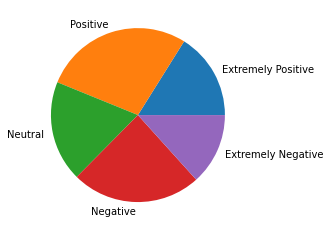

<Figure size 432x288 with 0 Axes>

In [29]:
plt.pie(t, labels = n)
plt.show()
plt.savefig('train.png')